* Projet IA Thématique : Fake News
* Année 2023-2024 IAS-M2LM-DS1
* Réalisé par : 

* VERA COSIO Ray Leonardo 
* VOISINE Mathieu
* MAZOUZ Lamia
* TIGHILT Kahina


### ANALYSE DES DONNEES

##### Exploration des données

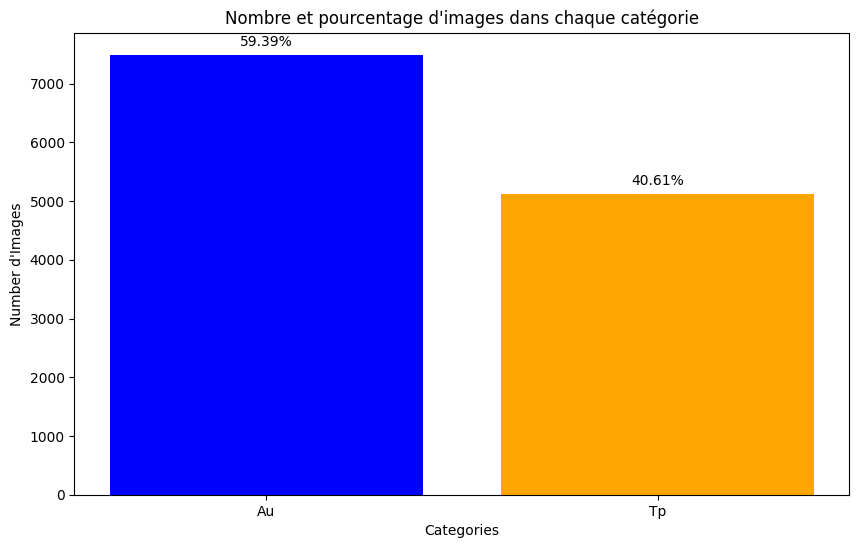

In [10]:
import os
import matplotlib.pyplot as plt

# Définir les chemins
dataset_dir = r'C:\AQUI TODO\python_dir\data'
categories = ['Au', 'Tp']

# Compter le nombre d'images dans chaque catégorie
count_images = {category: len(os.listdir(os.path.join(dataset_dir, category))) for category in categories}

# Calculer les pourcentages
total_images = sum(count_images.values())
percentages = {category: (count / total_images) * 100 for category, count in count_images.items()}

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(count_images.keys(), count_images.values(), color=['blue', 'orange'])
for i, (category, count) in enumerate(count_images.items()):
    plt.text(i, count + 100, f'{percentages[category]:.2f}%', ha='center', va='bottom')
plt.xlabel('Categories')
plt.ylabel("Number d'Images")
plt.title("Nombre et pourcentage d'images dans chaque catégorie")
plt.show()

##### Distribution des images une fois fait la validation et division

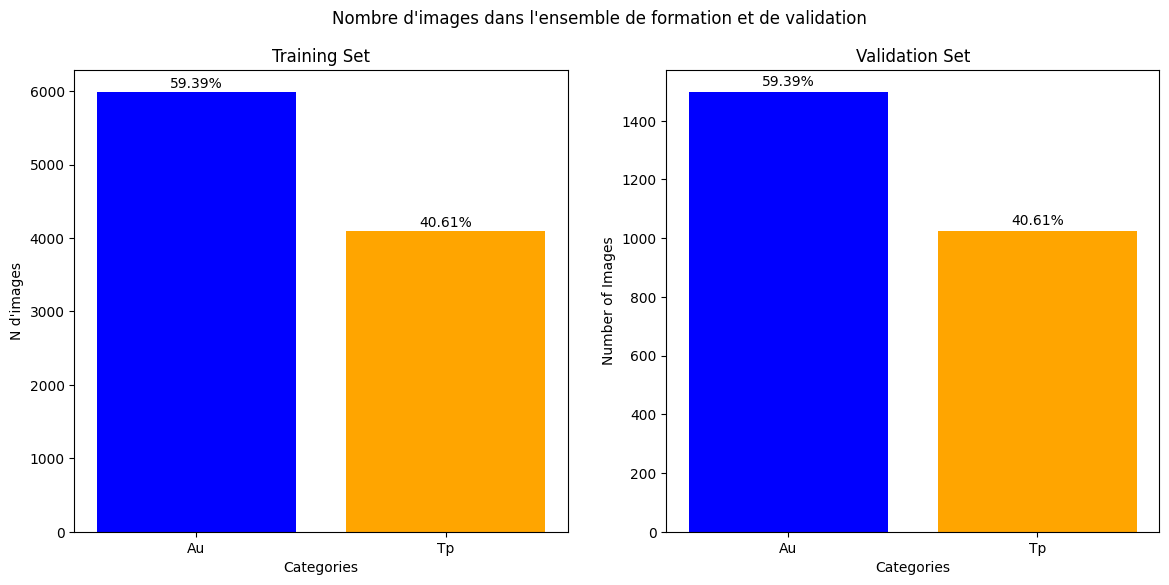

In [13]:
import os
import matplotlib.pyplot as plt

# Chemins des répertoires d'entraînement et de validation
train_dir = r'C:\AQUI TODO\python_dir\casia3_processed\train'
val_dir = r'C:\AQUI TODO\python_dir\casia3_processed\val'
categories = ['Au', 'Tp']

# Compter les images dans chaque sous-dossier d'entraînement et de validation
train_count_images = {category: len(os.listdir(os.path.join(train_dir, category))) for category in categories}
val_count_images = {category: len(os.listdir(os.path.join(val_dir, category))) for category in categories}

# Créer les graphiques pour les ensembles d'entraînement et de validation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour l'ensemble d'entraînement
axes[0].bar(train_count_images.keys(), train_count_images.values(), color=['blue', 'orange'])
for i, (category, count) in enumerate(train_count_images.items()):
    percentage = (count / sum(train_count_images.values())) * 100
    axes[0].text(i, count + 10, f'{percentage:.2f}%', ha='center', va='bottom')
axes[0].set_title('Training Set')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel("N d'images")

# Graphique pour l'ensemble de validation
axes[1].bar(val_count_images.keys(), val_count_images.values(), color=['blue', 'orange'])
for i, (category, count) in enumerate(val_count_images.items()):
    percentage = (count / sum(val_count_images.values())) * 100
    axes[1].text(i, count + 10, f'{percentage:.2f}%', ha='center', va='bottom')
axes[1].set_title('Validation Set')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Number of Images')

plt.suptitle("Nombre d'images dans l'ensemble de formation et de validation")
plt.show()


#### analyse exploratoire des images

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Chemins des répertoires de données
dataset_dir = r'C:\AQUI TODO\python_dir\data'
categories = ['Au', 'Tp']


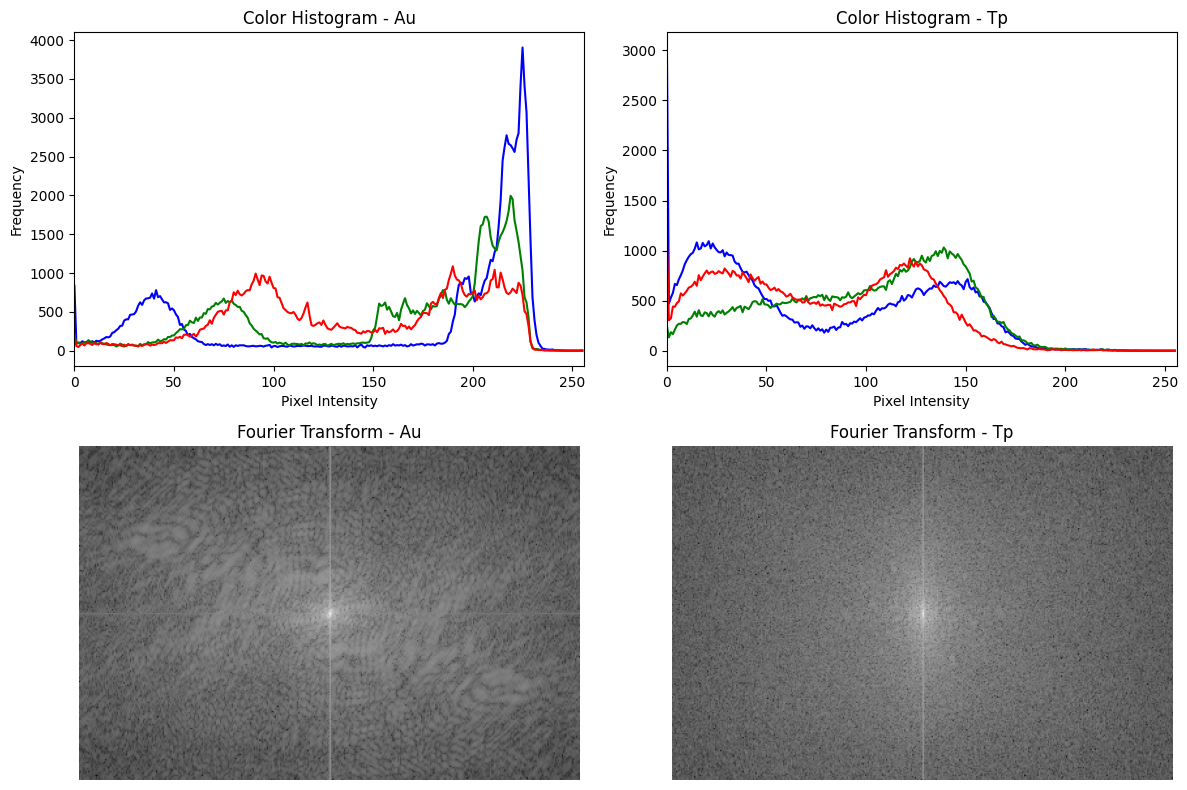

In [15]:
# Fonction pour afficher l'histogramme des couleurs
def plot_color_histogram(image, ax, title):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        ax.plot(hist, color=color)
        ax.set_xlim([0, 256])
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

# Fonction pour afficher la transformée de Fourier
def plot_fourier_transform(image, ax, title):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    ax.imshow(magnitude_spectrum, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Sélectionner des images exemples pour chaque catégorie
sample_images = {}
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    sample_images[category] = cv2.imread(os.path.join(category_path, os.listdir(category_path)[0]))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogrammes des couleurs
plot_color_histogram(sample_images['Au'], axes[0, 0], 'Color Histogram - Au')
plot_color_histogram(sample_images['Tp'], axes[0, 1], 'Color Histogram - Tp')

# Transformées de Fourier
plot_fourier_transform(sample_images['Au'], axes[1, 0], 'Fourier Transform - Au')
plot_fourier_transform(sample_images['Tp'], axes[1, 1], 'Fourier Transform - Tp')

plt.tight_layout()
plt.show()


In [19]:
import os
from collections import Counter
import exifread

# Définir le chemin vers le répertoire des images
dataset_dir = r'C:\AQUI TODO\python_dir\data'
categories = ['Au', 'Tp']

def analyze_metadata(image_path):
    """
    Analyse les métadonnées d'une image et retourne les résultats.
    """
    try:
        with open(image_path, 'rb') as f:
            tags = exifread.process_file(f)
        
        metadata = {}
        for tag in tags.keys():
            if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
                metadata[tag] = tags[tag]
        
        return metadata
    except Exception as e:
        return None

def summarize_metadata(metadata_list):
    """
    Résume les métadonnées extraites en comptant les occurrences de chaque valeur pour les champs pertinents.
    """
    summary = {
        'CameraModels': Counter(),
        'DateTime': Counter(),
        'Software': Counter()
    }
    
    for metadata in metadata_list:
        if metadata:
            if 'Image Model' in metadata:
                summary['CameraModels'][str(metadata['Image Model'])] += 1
            if 'Image DateTime' in metadata:
                summary['DateTime'][str(metadata['Image DateTime'])[:10]] += 1
            if 'Image Software' in metadata:
                summary['Software'][str(metadata['Image Software'])] += 1
    
    return summary

def analyze_images_in_category(category_path):
    """
    Analyse les métadonnées de toutes les images dans un répertoire donné et retourne un résumé.
    """
    images = os.listdir(category_path)
    metadata_list = []
    for image_name in images:
        image_path = os.path.join(category_path, image_name)
        metadata = analyze_metadata(image_path)
        metadata_list.append(metadata)
    
    return summarize_metadata(metadata_list)

# Analyser les images authentiques (Au) et manipulées (Tp)
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    summary = analyze_images_in_category(category_path)
    
    print(f"\nSummary for category {category}:")
    print("Camera Models:")
    for model, count in summary['CameraModels'].items():
        print(f"  {model}: {count}")
    print("Dates of Images:")
    for date, count in summary['DateTime'].items():
        print(f"  {date}: {count}")
    print("Software Used:")
    for software, count in summary['Software'].items():
        print(f"  {software}: {count}")
    print("\n")


Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD


Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field LensModel in MakerNote IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly


Summary for category Au:
Camera Models:
  NIKON D2X: 5
  NIKON D80: 7
  NIKON D70: 9
  FinePix F100fd : 46
  Canon PowerShot S3 IS: 13
  Canon EOS 30D: 12
  NIKON D200: 23
  NIKON D70s: 15
  NIKON D90: 4
  Canon EOS 450D: 4
  Canon EOS 20D: 13
  Canon EOS 300D DIGITAL: 2
  Canon EOS 10D: 2
  FinePix S304  : 2
  Canon EOS 400D DIGITAL: 1
  Canon PowerShot A520: 1
  Canon EOS 5D: 20
  FinePix S3Pro  : 31
  DSC-T100: 6
  Canon EOS-1Ds Mark II: 2
  Canon PowerShot S400: 1
  Canon EOS 40D: 10
  DSC-P72: 1
  CYBERSHOT: 1
  FinePix F60fd  : 9
  Canon EOS 5D Mark II: 5
  Canon EOS 350D DIGITAL: 17
  FinePix S9600  : 7
  DSLR-A350: 1
  Canon PowerShot A720 IS: 4
  NIKON D700: 16
  DSC-F828: 6
  Canon DIGITAL IXUS 70: 2
  NIKON D40: 2
  1234: 2
  DSC-H5: 1
  <Samsung NV3, Samsung VLUU NV3>: 1
  NIKON D300: 1
  SP-3000: 1
  Canon PowerShot A590 IS: 3
  FinePix F40fd  : 1
  DMC-LX2: 1
  FinePix S5Pro  : 1
  C770UZ: 1
  DMC-FS20: 1
  FinePix S7000 : 1
  DSC-W120: 1
  FinePix Z5fd   : 1
Dates of Im

Analyzing metadata for category: Au


Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corrupted field Software in Image IFD
Possibly corr


Summary for category Au:
Camera Models:
  NIKON D2X: 5
  NIKON D80: 7
  NIKON D70: 9
  FinePix F100fd : 46
  Canon PowerShot S3 IS: 13
  Canon EOS 30D: 12
  NIKON D200: 23
  NIKON D70s: 15
  NIKON D90: 4
  Canon EOS 450D: 4
  Canon EOS 20D: 13
  Canon EOS 300D DIGITAL: 2
  Canon EOS 10D: 2
  FinePix S304  : 2
  Canon EOS 400D DIGITAL: 1
  Canon PowerShot A520: 1
  Canon EOS 5D: 20
  FinePix S3Pro  : 31
  DSC-T100: 6
  Canon EOS-1Ds Mark II: 2
  Canon PowerShot S400: 1
  Canon EOS 40D: 10
  DSC-P72: 1
  CYBERSHOT: 1
  FinePix F60fd  : 9
  Canon EOS 5D Mark II: 5
  Canon EOS 350D DIGITAL: 17
  FinePix S9600  : 7
  DSLR-A350: 1
  Canon PowerShot A720 IS: 4
  NIKON D700: 16
  DSC-F828: 6
  Canon DIGITAL IXUS 70: 2
  NIKON D40: 2
  1234: 2
  DSC-H5: 1
  <Samsung NV3, Samsung VLUU NV3>: 1
  NIKON D300: 1
  SP-3000: 1
  Canon PowerShot A590 IS: 3
  FinePix F40fd  : 1
  DMC-LX2: 1
  FinePix S5Pro  : 1
  C770UZ: 1
  DMC-FS20: 1
  FinePix S7000 : 1
  DSC-W120: 1
  FinePix Z5fd   : 1
Dates of Im

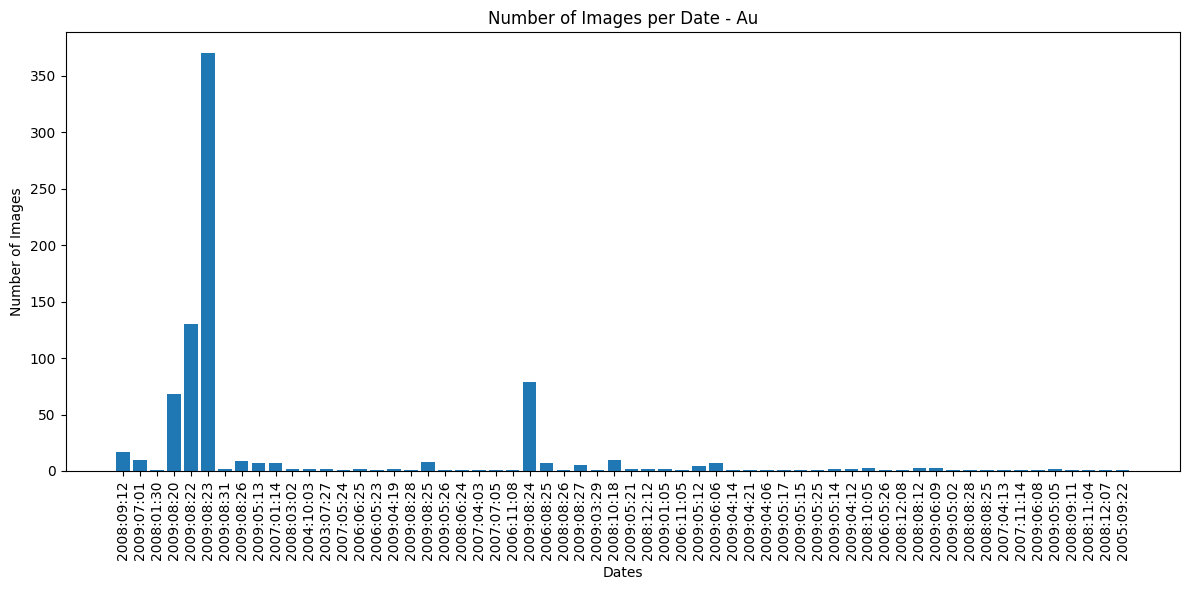

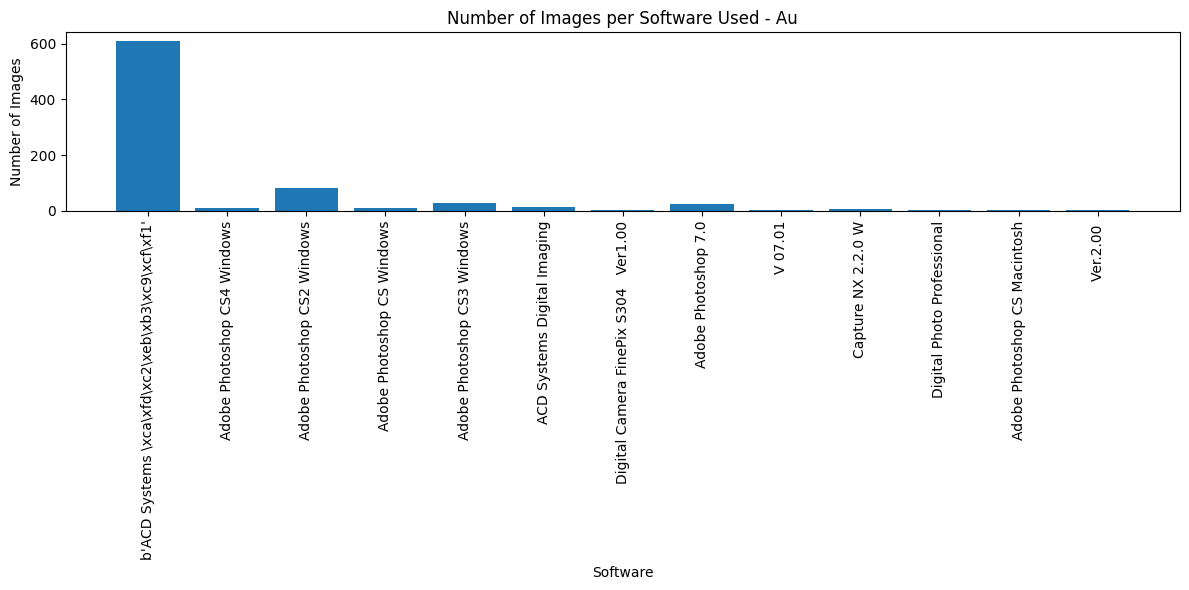

Analyzing metadata for category: Tp

Summary for category Tp:
Camera Models:
  FinePix F100fd : 150
  NIKON D200: 39
  SP-3000: 2
  NIKON D70s: 21
  FinePix F60fd  : 39
  Canon EOS-1Ds Mark II: 8
  NIKON D70: 10
  Canon EOS 20D: 17
  FinePix S3Pro  : 45
  FinePix S9600  : 13
  Canon EOS 5D Mark II: 7
  Canon EOS 350D DIGITAL: 27
  NIKON D700: 35
  Canon PowerShot S3 IS: 38
  NIKON D80: 11
  FinePix Z5fd   : 2
  NIKON D90: 7
  Canon EOS 10D: 3
  Canon EOS 5D: 31
  DSC-F828: 10
  Canon EOS 30D: 18
  DMC-FS20: 2
  1234: 5
  NIKON D2X: 13
  Canon EOS 400D DIGITAL: 3
  Canon PowerShot A590 IS: 4
  DSC-W120: 2
  FinePix S304  : 3
  Canon EOS 450D: 5
  NIKON D300: 2
  Canon PowerShot A720 IS: 7
  Canon EOS 40D: 15
  Canon EOS 300D DIGITAL: 2
  DSC-H5: 3
  <Samsung NV3, Samsung VLUU NV3>: 2
  Canon DIGITAL IXUS 70: 2
  DSC-P72: 1
  CYBERSHOT: 1
  DMC-LX2: 1
  DSC-T100: 7
  Canon PowerShot S400: 4
  DSLR-A350: 2
  FinePix F40fd  : 2
  FinePix S5Pro  : 1
  C770UZ: 1
  FinePix S7000 : 2
  Canon P

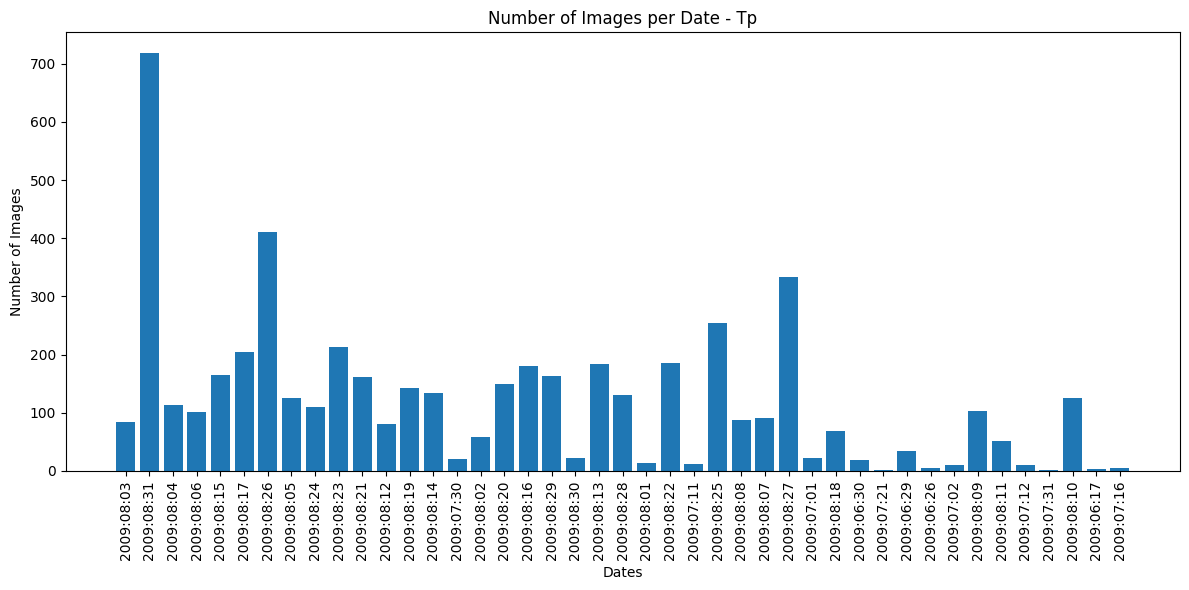

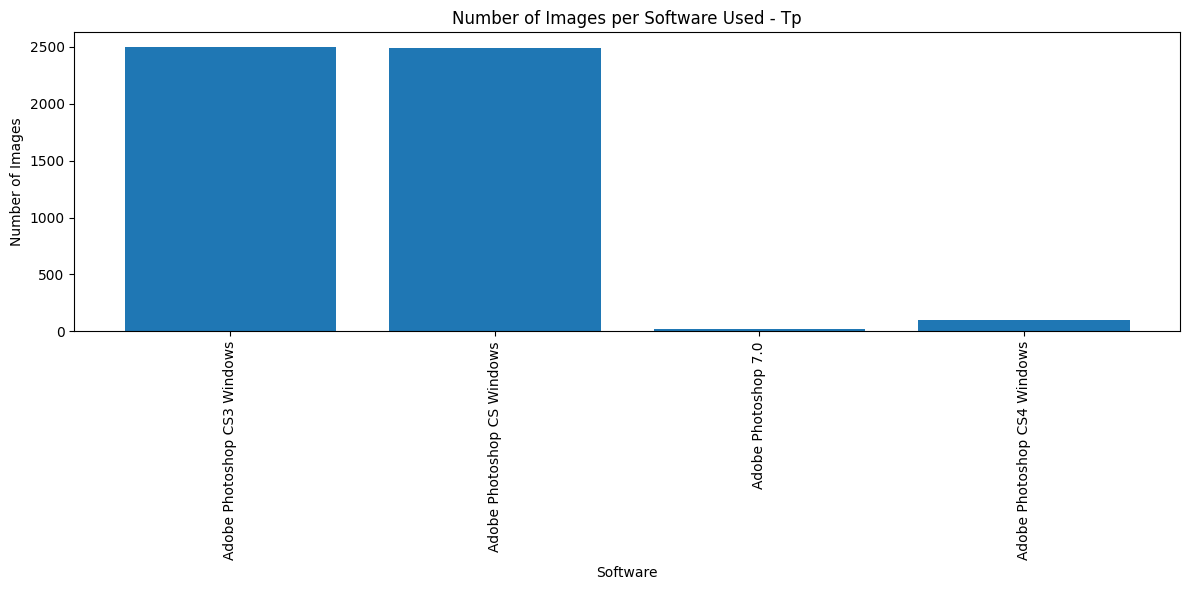

In [21]:
import os
from collections import Counter
import exifread
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire des images
dataset_dir = r'C:\AQUI TODO\python_dir\data'
categories = ['Au', 'Tp']

def analyze_metadata(image_path):
    """
    Analyse les métadonnées d'une image et retourne les résultats.
    """
    try:
        with open(image_path, 'rb') as f:
            tags = exifread.process_file(f)
        
        metadata = {}
        for tag in tags.keys():
            if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
                metadata[tag] = tags[tag]
        
        return metadata
    except Exception as e:
        return None

def summarize_metadata(metadata_list):
    """
    Résume les métadonnées extraites en comptant les occurrences de chaque valeur pour les champs pertinents.
    """
    summary = {
        'CameraModels': Counter(),
        'DateTime': Counter(),
        'Software': Counter()
    }
    
    for metadata in metadata_list:
        if metadata:
            if 'Image Model' in metadata:
                summary['CameraModels'][str(metadata['Image Model'])] += 1
            if 'Image DateTime' in metadata:
                summary['DateTime'][str(metadata['Image DateTime'])[:10]] += 1
            if 'Image Software' in metadata:
                summary['Software'][str(metadata['Image Software'])] += 1
    
    return summary

def analyze_images_in_category(category_path):
    """
    Analyse les métadonnées de toutes les images dans un répertoire donné et retourne un résumé.
    """
    images = os.listdir(category_path)
    metadata_list = []
    for image_name in images:
        image_path = os.path.join(category_path, image_name)
        metadata = analyze_metadata(image_path)
        metadata_list.append(metadata)
    
    return summarize_metadata(metadata_list)

def plot_summary(summary, category):
    # Graphique des dates des images
    plt.figure(figsize=(12, 6))
    plt.bar(summary['DateTime'].keys(), summary['DateTime'].values())
    plt.xticks(rotation=90)
    plt.xlabel('Dates')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images per Date - {category}')
    plt.tight_layout()
    plt.show()

    # Graphique des logiciels utilisés
    plt.figure(figsize=(12, 6))
    plt.bar(summary['Software'].keys(), summary['Software'].values())
    plt.xticks(rotation=90)
    plt.xlabel('Software')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images per Software Used - {category}')
    plt.tight_layout()
    plt.show()

# Analyser et générer les graphiques pour les images authentiques (Au) et manipulées (Tp)
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    print(f"Analyzing metadata for category: {category}")
    summary = analyze_images_in_category(category_path)
    
    print(f"\nSummary for category {category}:")
    print("Camera Models:")
    for model, count in summary['CameraModels'].items():
        print(f"  {model}: {count}")
    print("Dates of Images:")
    for date, count in summary['DateTime'].items():
        print(f"  {date}: {count}")
    print("Software Used:")
    for software, count in summary['Software'].items():
        print(f"  {software}: {count}")
    print("\n")
    
    plot_summary(summary, category)


## MODÈLE DE DÉTECTION D'IMAGES MANIPULEES

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
## lien donnees
## https://github.com/namtpham/casia2groundtruth/blob/master/CASIA2.0_Groundtruth.zip

In [ ]:
# Definir routes
#route 'C:\AQUI TODO\python_dir\data' contenant les dossier TP et AU
dataset_dir = r'C:\AQUI TODO\python_dir\data'
output_dir = r'C:\AQUI TODO\python_dir\casia3_processed'

os.makedirs(output_dir, exist_ok=True)

* dataset_dir : chemin où se trouvent les dossiers Au (authentiques) et Tp (manipulés) d'origine.
* output_dir : Chemin où les images prétraitées seront stockées. os.makedirs s'assure que le répertoire existe, en le créant si nécessaire.

In [ ]:
# Creer des dossier entrainement et validation
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

* train_dir et val_dir : sous-répertoires dans output_dir pour stocker respectivement les images de formation et de validation.
* os.makedirs : Crée les dossiers de formation et de validation s'ils n'existent pas.

In [ ]:
# Creer sousdossiers
for category in ['Au', 'Tp']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

* Au (authentique) et Tp (manipulé) sont les deux types.
* Des sous-répertoires sont créés dans les dossiers de formation et de validation pour chaque classe.

In [ ]:
# Diviser les imágenes en groupes d'entrainement et validation
for category in ['Au', 'Tp']:
    category_path = os.path.join(dataset_dir, category)
    images = os.listdir(category_path)
    train_images, val_images = train_test_split(images, 
                                                test_size=0.2, 
                                                random_state=42)
    
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_dir, category, image))
    
    for image in val_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(val_dir, category, image))

* train_test_split : divise les images en 80 % pour la formation et 20 % pour la validation.
* shutil.copy : copiez les images dans leurs dossiers de formation et de validation respectifs.

In [ ]:
# Definir generateurs de donnees
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True, 
                                   rotation_range=20, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

* ImageDataGenerator : classe Keras utilisée pour générer des lots de données d'image augmentées en temps réel.
* rescale=1./255 : met à l'échelle les valeurs des pixels à [0, 1].
* horizontal_flip=True : retournez les images horizontalement de manière aléatoire.
* rotation_range=20 : faites pivoter les images de manière aléatoire jusqu'à 20 degrés.
* zoom_range=0.2 : zoome de manière aléatoire jusqu'à 20 %.

In [ ]:
# Creer generateurs de donnees
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(256, 256), 
    batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(256, 256), 
    batch_size=32, class_mode='binary')

Found 10090 images belonging to 2 classes.
Found 2524 images belonging to 2 classes.


* flow_from_directory : créez des générateurs de données à partir de répertoires.
* target_size : redimensionnez les images à 256 x 256 pixels.
* batch_size : nombre d'images par lot.
* class_mode='binary' : Classification binaire (authentique ou manipulée).

In [ ]:
# Construir le modele
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\FRLV08231\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Sequential : modèle séquentiel Keras.
* Conv2D : couche de convolution.
* 32, 64, 128 : Nombre de filtres.
* (3, 3) : Taille du noyau.
* activation='relu' : fonction d'activation ReLU.
* input_shape=(256, 256, 3) : Taille d'entrée (256x256 pixels, 3 canaux de couleur).
* MaxPooling2D : couche de pooling maximale.
* pool_size=(2, 2) : Taille du filtre de pooling.
* Flatten : Aplatit l’entrée.
* Dense : Couche densément connectée.
* 512 : Nombre de neurones.
* activation='relu' : fonction d'activation ReLU.
* Dropout : régularisation pour éviter le surapprentissage.
* 0,5 : 50 % de taux d’abandon.
* Dense(1, activation='sigmoid') : couche de sortie avec activation sigmoïde pour la classification binaire.

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

* optimiseur='adam' : optimiseur Adam.
* loss='binary_crossentropy' : fonction de perte de crossentropie binaire.
* metrics=['accuracy'] : métrique de précision pour évaluer le modèle.

In [ ]:
# entrainer le modele
history = model.fit(train_generator, 
                    epochs=20, 
                    validation_data=val_generator)

# Evaluer le modele
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20


C:\Users\FRLV08231\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


316/316 ━━━━━━━━━━━━━━━━━━━━ 878s 3s/step - accuracy: 0.5819 - loss: 0.8840 - val_accuracy: 0.5939 - val_loss: 0.6642
Epoch 2/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 852s 3s/step - accuracy: 0.5912 - loss: 0.6560 - val_accuracy: 0.6300 - val_loss: 0.6522
Epoch 3/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.6181 - loss: 0.6485 - val_accuracy: 0.6339 - val_loss: 0.6462
Epoch 4/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 652s 2s/step - accuracy: 0.6251 - loss: 0.6421 - val_accuracy: 0.6363 - val_loss: 0.6416
Epoch 5/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.6396 - loss: 0.6360 - val_accuracy: 0.6311 - val_loss: 0.6421
Epoch 6/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 797s 3s/step - accuracy: 0.6397 - loss: 0.6372 - val_accuracy: 0.6399 - val_loss: 0.6397
Epoch 7/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 907s 3s/step - accuracy: 0.6415 - loss: 0.6306 - val_accuracy: 0.6533 - val_loss: 0.6331
Epoch 8/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 709s 2s/step - accuracy: 0.6513 - loss: 0.6241 - val_accuracy: 0.678

* model.fit : entraîner le modèle.
* train_generator : générateur de données de formation.
* époques=20 : Nombre d’époques.
* validation_data=val_generator : Générateur de données de validation.

* model.evaluate : évaluez le modèle sur l'ensemble de données de validation.

In [ ]:
model.save('fake_image_detector_ver2.h5')

* model.save : enregistre le modèle entraîné dans un fichier HDF5 (.h5) pour une utilisation ultérieure.

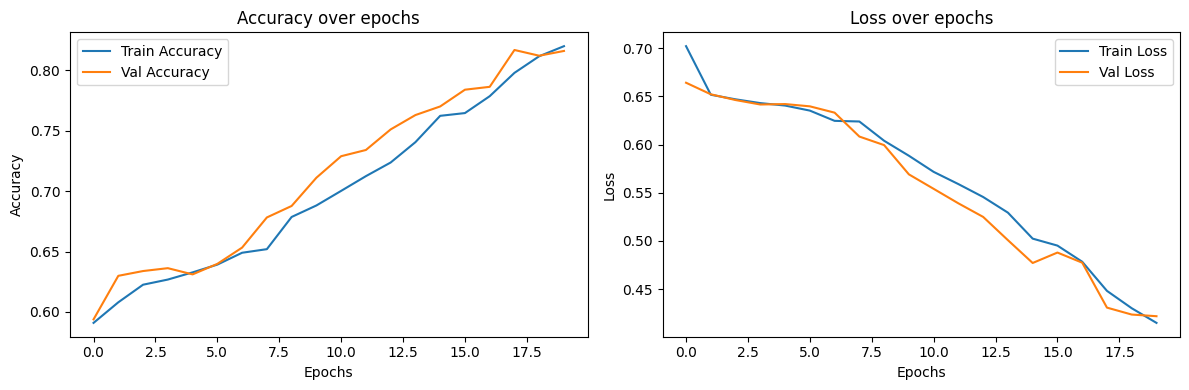

In [ ]:
# Tracer les courbes de précision et de perte
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Prédictions et évaluation supplémentaire
import numpy as np
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step


In [ ]:
# Obtenir les vraies étiquettes
y_true = val_generator.classes

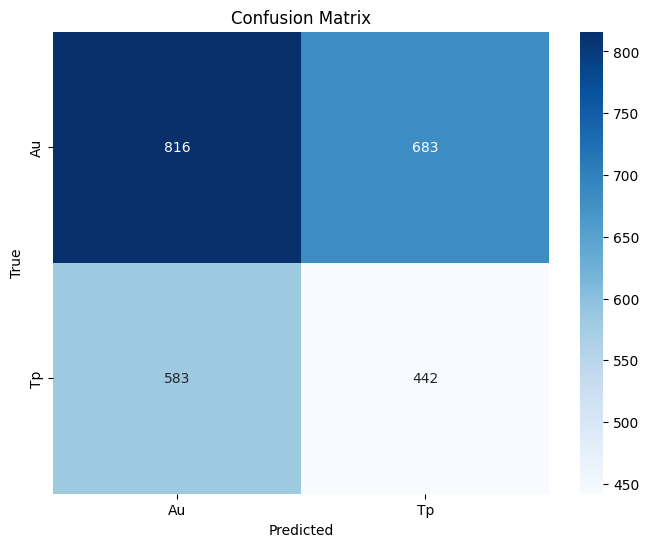

In [ ]:
# Matrice de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Au', 'Tp'], yticklabels=['Au', 'Tp'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred, target_names=['Au', 'Tp'])
print(class_report)

              precision    recall  f1-score   support

          Au       0.58      0.54      0.56      1499
          Tp       0.39      0.43      0.41      1025

    accuracy                           0.50      2524
   macro avg       0.49      0.49      0.49      2524
weighted avg       0.51      0.50      0.50      2524



## TESTING MODEL

#### Ici on fait le test des differents photos du model deja enregistré en format ".h5"

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import exifread
import os
# Charger le modele cree
model = load_model('fake_image_detector_ver2.h5')

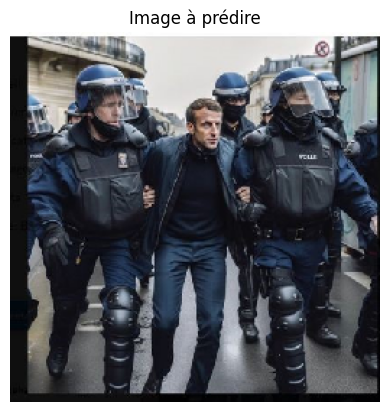

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Prédiction: 0.7081974744796753
L'image est manipulée.


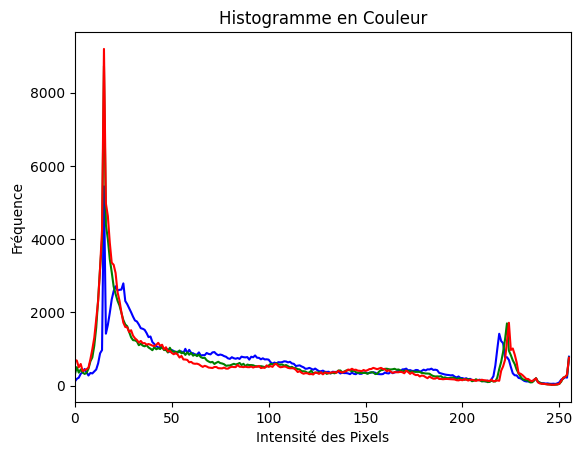

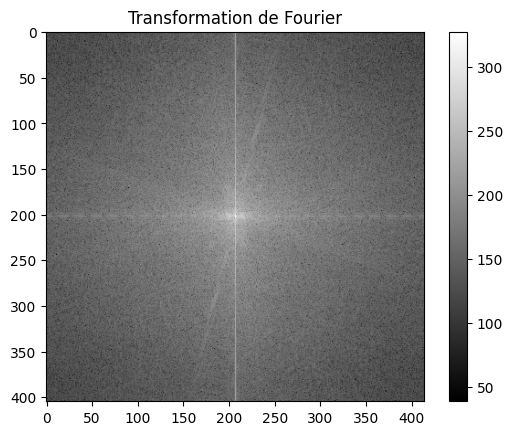

Logiciel utilisé: Non disponible
Date de l'image: Non disponible
Poids de l'image: 0.05 MB


In [4]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def plot_color_histogram(img_path):
    img = cv2.imread(img_path)
    color = ('b', 'g', 'r')
    plt.figure()
    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Histogramme en Couleur')
    plt.xlabel('Intensité des Pixels')
    plt.ylabel('Fréquence')
    plt.show()

def plot_fourier_transform(img_path):
    img = cv2.imread(img_path, 0)  # Lire l'image en niveaux de gris
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Transformation de Fourier')
    plt.colorbar()
    plt.show()

def extract_metadata(img_path):
    with open(img_path, 'rb') as f:
        tags = exifread.process_file(f)
    software = tags.get('Image Software', 'Non disponible')
    datetime = tags.get('Image DateTime', 'Non disponible')
    size_mb = os.path.getsize(img_path) / (1024 * 1024)
    return software, datetime, size_mb

# Chemin de l'image à prédire
img_path = 'C:/AQUI TODO/python_dir/Imgtester/macron.jpg'

# Prétraitement de l'image
img_array = preprocess_image(img_path)

# Affichage de l'image
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.title('Image à prédire')
plt.axis('off')
plt.show()

# Prédiction
prediction = model.predict(img_array)
print(f"Prédiction: {prediction[0][0]}")

# Interprétation de la prédiction
if prediction[0][0] > 0.5:
    print("L'image est manipulée.")
else:
    print("L'image est authentique.")

# Analyse de l'histogramme en couleur
plot_color_histogram(img_path)

# Analyse de l'image par transformation de Fourier
plot_fourier_transform(img_path)

# Extraction des métadonnées
software, datetime, size_mb = extract_metadata(img_path)
print(f"Logiciel utilisé: {software}")
print(f"Date de l'image: {datetime}")
print(f"Poids de l'image: {size_mb:.2f} MB")

#### 2eme TEST

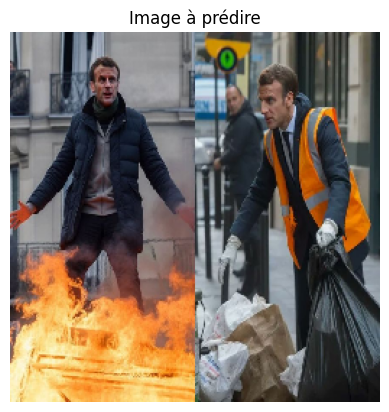

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prédiction: 0.7630490064620972
L'image est manipulée.


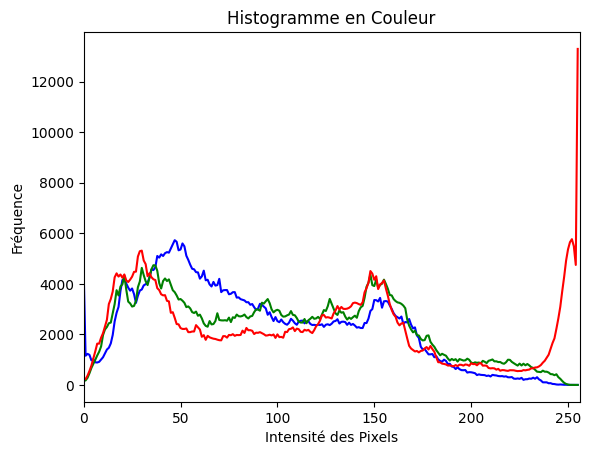

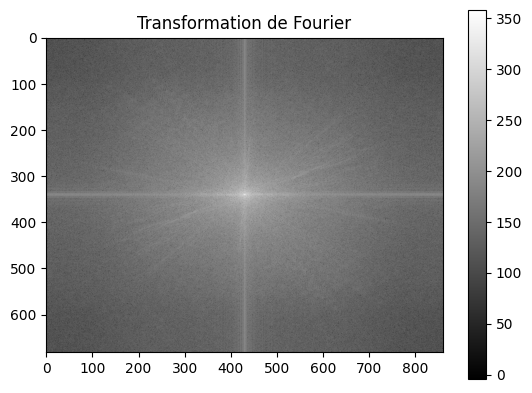

Logiciel utilisé: Non disponible
Date de l'image: Non disponible
Poids de l'image: 0.08 MB


In [5]:
# Chemin de l'image à prédire
img_path = 'C:/AQUI TODO/python_dir/Imgtester/860_sc_ia-macron-2.jpg'

# Prétraitement de l'image
img_array = preprocess_image(img_path)

# Affichage de l'image
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.title('Image à prédire')
plt.axis('off')
plt.show()

# Prédiction
prediction = model.predict(img_array)
print(f"Prédiction: {prediction[0][0]}")

# Interprétation de la prédiction
if prediction[0][0] > 0.5:
    print("L'image est manipulée.")
else:
    print("L'image est authentique.")

# Analyse de l'histogramme en couleur
plot_color_histogram(img_path)

# Analyse de l'image par transformation de Fourier
plot_fourier_transform(img_path)

# Extraction des métadonnées
software, datetime, size_mb = extract_metadata(img_path)
print(f"Logiciel utilisé: {software}")
print(f"Date de l'image: {datetime}")
print(f"Poids de l'image: {size_mb:.2f} MB")

##### 3EME TEST

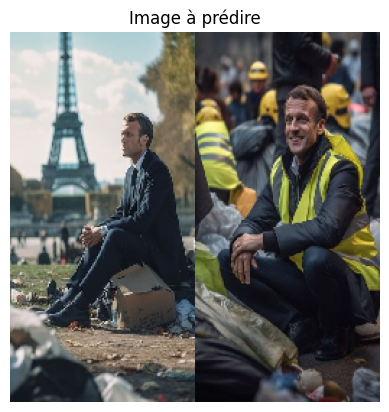

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prédiction: 0.7490653991699219
L'image est manipulée.


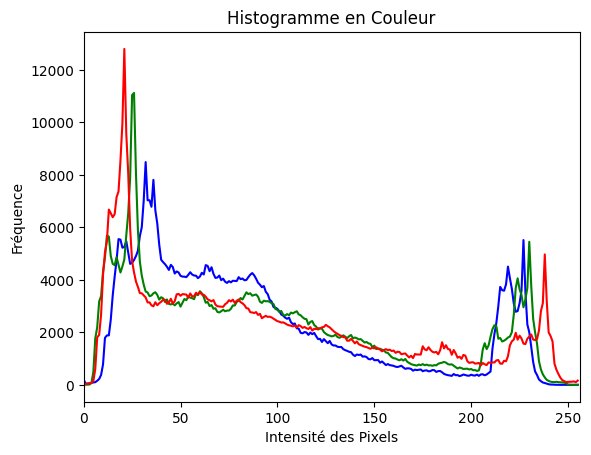

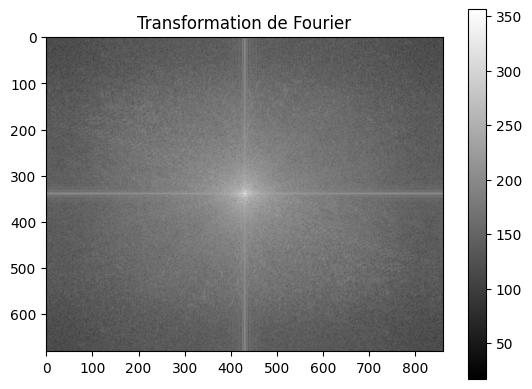

Logiciel utilisé: Non disponible
Date de l'image: Non disponible
Poids de l'image: 0.08 MB


In [6]:
# Chemin de l'image à prédire
img_path = 'C:/AQUI TODO/python_dir/Imgtester/860_sc_macron-ia.jpg'

# Prétraitement de l'image
img_array = preprocess_image(img_path)

# Affichage de l'image
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.title('Image à prédire')
plt.axis('off')
plt.show()

# Prédiction
prediction = model.predict(img_array)
print(f"Prédiction: {prediction[0][0]}")

# Interprétation de la prédiction
if prediction[0][0] > 0.5:
    print("L'image est manipulée.")
else:
    print("L'image est authentique.")

# Analyse de l'histogramme en couleur
plot_color_histogram(img_path)

# Analyse de l'image par transformation de Fourier
plot_fourier_transform(img_path)

# Extraction des métadonnées
software, datetime, size_mb = extract_metadata(img_path)
print(f"Logiciel utilisé: {software}")
print(f"Date de l'image: {datetime}")
print(f"Poids de l'image: {size_mb:.2f} MB")

##### 4eme TEST

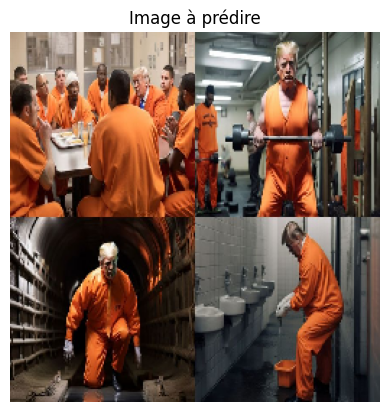

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Prédiction: 0.8387995958328247
L'image est manipulée.


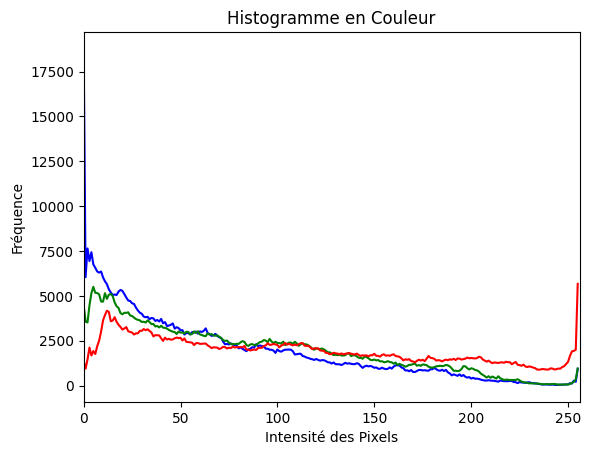

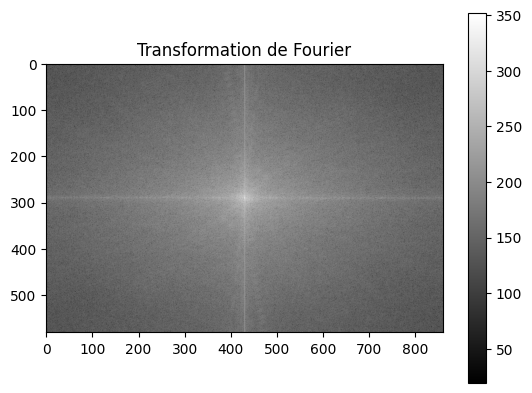

Logiciel utilisé: Non disponible
Date de l'image: Non disponible
Poids de l'image: 0.09 MB


In [7]:
# Chemin de l'image à prédire
img_path = 'C:/AQUI TODO/python_dir/Imgtester/860_sc_trump-prison.jpg'

# Prétraitement de l'image
img_array = preprocess_image(img_path)

# Affichage de l'image
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.title('Image à prédire')
plt.axis('off')
plt.show()

# Prédiction
prediction = model.predict(img_array)
print(f"Prédiction: {prediction[0][0]}")

# Interprétation de la prédiction
if prediction[0][0] > 0.5:
    print("L'image est manipulée.")
else:
    print("L'image est authentique.")

# Analyse de l'histogramme en couleur
plot_color_histogram(img_path)

# Analyse de l'image par transformation de Fourier
plot_fourier_transform(img_path)

# Extraction des métadonnées
software, datetime, size_mb = extract_metadata(img_path)
print(f"Logiciel utilisé: {software}")
print(f"Date de l'image: {datetime}")
print(f"Poids de l'image: {size_mb:.2f} MB")

##### 5eme TEST

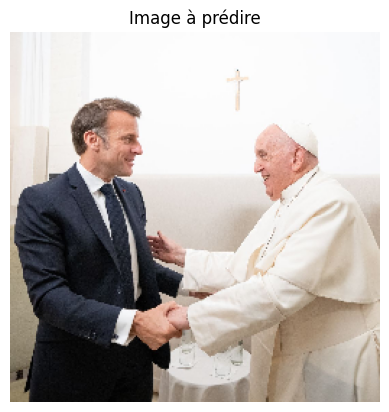

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Prédiction: 0.8050712943077087
L'image est manipulée.


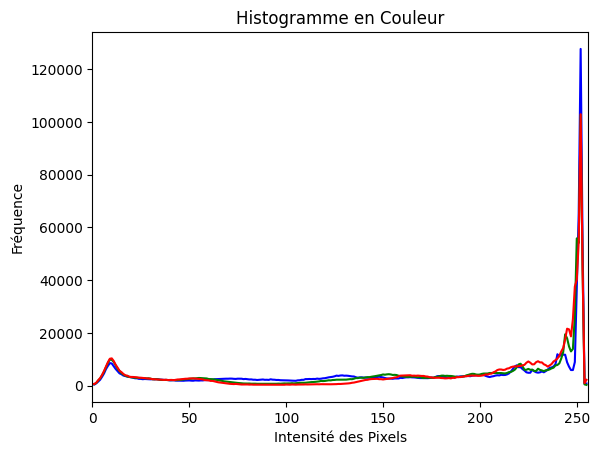

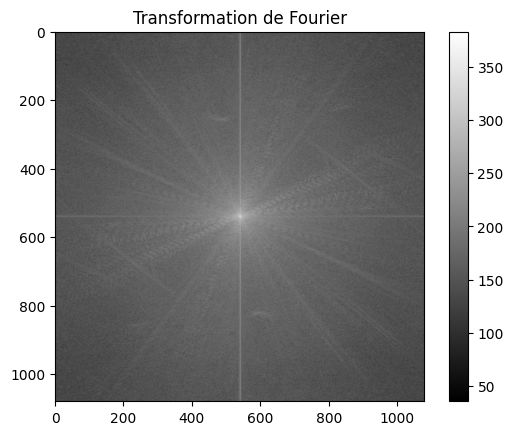

Logiciel utilisé: Non disponible
Date de l'image: Non disponible
Poids de l'image: 0.10 MB


In [20]:
model = load_model('fake_image_detector.h5')
# Chemin de l'image à prédire
img_path = 'C:/AQUI TODO/python_dir/Imgtester/papeetmacron.jpg'

# Prétraitement de l'image
img_array = preprocess_image(img_path)

# Affichage de l'image
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.title('Image à prédire')
plt.axis('off')
plt.show()

# Prédiction
prediction = model.predict(img_array)
print(f"Prédiction: {prediction[0][0]}")

# Interprétation de la prédiction
if prediction[0][0] > 0.5:
    print("L'image est manipulée.")
else:
    print("L'image est authentique.")

# Analyse de l'histogramme en couleur
plot_color_histogram(img_path)

# Analyse de l'image par transformation de Fourier
plot_fourier_transform(img_path)

# Extraction des métadonnées
software, datetime, size_mb = extract_metadata(img_path)
print(f"Logiciel utilisé: {software}")
print(f"Date de l'image: {datetime}")
print(f"Poids de l'image: {size_mb:.2f} MB")